## Loading the Dataset


In [70]:
pip install ucimlrepo

In [71]:
from ucimlrepo import fetch_ucirepo


# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
# X = adult.data.features
# y = adult.data.targets

adult_dataset_original = adult.data.original
# print(adult_dataset.shape)

# df = pd.read_csv('adult.data')
# print(df.shape)

# metadata and variable info
print(adult.metadata, '/n/n/n')
print(adult.variables)

# Concatenating the features and target along columns (axis=1)
# adult_data = pd.concat([X, y], axis=1)
# print(adultData)

#checking whether both datasets are the same or not.
# import pandas.testing as pd_testing
# try:
#     pd_testing.assert_frame_equal(df, adult_dataset)
#     print("Datasets are identical.")
# except AssertionError as e:
#     print("Datasets are different:", e)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

## Loading necessary Libs, Frameworks


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display   # to display df  in a structured format
from tabulate import tabulate   # to display the tables in a more visually appealing format.


# Exploratory Data Analysis

In [73]:
# calculating the intial  number of duplicate rows.
num_of_duplicates = adult_dataset_original.duplicated().sum()
print("The total number of duplicates found in this dataset is : ", num_of_duplicates)

The total number of duplicates found in this dataset is :  29


## Overall Dataset

In [74]:
# view the head and the tail of dataset
# display(adult_dataset.head())
# display(adult_dataset.tail())
# display(adult_dataset)

adult_dataset_original

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [75]:
#columns | non-Null count | Dtype
# display(adult_dataset.info())
adult_dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [76]:
# viewing the columns names which contain NaN / None as values
# checks along the column axis (axis = 0)
# True if contains Nan / None
# print(adult_dataset_original.isnull().any())

print("Dataset feature columns that contains null values : \n", adult_dataset_original.columns[adult_dataset_original.isnull().any()])

print("\nNo of null values under each feature variable : ")
print(adult_dataset_original.isnull().sum())

print("\nTotal No of null values in the dataset : ")
adult_dataset_original.isnull().sum().sum()

Dataset feature columns that contains null values : 
 Index(['workclass', 'occupation', 'native-country'], dtype='object')

No of null values under each feature variable : 
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Total No of null values in the dataset : 


2203

## Handling the 'fnlwgt' - final weight column

In [77]:
# getting a copy of the original adult dataframe to perform preprocessing steps on it.
preprocessing_adult_dataset = adult_dataset_original.copy()


In [78]:
'''fnlwgt column (final weight) : this represents the weight assigned to each individual in the survey data.
This weight indicates the number of people in the population that each record represents.
It is used to adjust for oversampling or undersampling of particular groups during the survey process.
Therefore it is typically not a feature that directly relates to the target variable.'''

print("No of unique values in 'fnlwgt' column : ", len(adult_dataset_original["fnlwgt"].unique()))


No of unique values in 'fnlwgt' column :  28523


In [79]:
# dropping the column 'fnlwgt'
preprocessing_adult_dataset.drop('fnlwgt', axis = 1, inplace = True) #inplace does the changes to the existing df
display(preprocessing_adult_dataset )# this contains the dataset without the 'fnlwgt' column
# preprocessing_adult_dataset.shape

""" dataframe shape is reduced to 48842 * 14 """

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


' dataframe shape is reduced to 48842 * 14 '

## Handilng the Target variable - "Income" values

In [80]:
# Setting the 'Income' values to 2 vlaues (>50K, <=50K.)  as shown in the Adult UCIMLRepo.
print("Before replacing 'income' column values :  ")
print(preprocessing_adult_dataset['income'].value_counts())

print("\n\nAfter replacing the values :  ")
preprocessing_adult_dataset['income'].replace('<=50K', '<=50K.', inplace=True)
preprocessing_adult_dataset['income'].replace('>50K.', '>50K', inplace=True)
print(preprocessing_adult_dataset['income'].value_counts())

Before replacing 'income' column values :  
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64


After replacing the values :  
<=50K.    37155
>50K      11687
Name: income, dtype: int64


## 'age' Column Analysis

Statistical analysis of 'age' column:
 count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64 




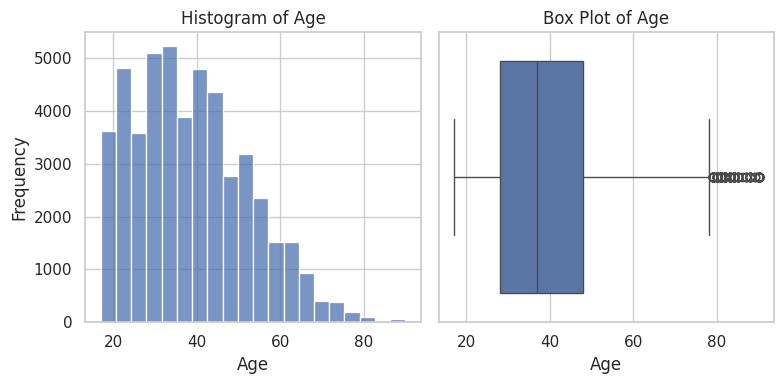

In [81]:
# preprocessing_adult_dataset['age'].unique()
stat_age_before_preprocess = preprocessing_adult_dataset['age'].describe()
print("Statistical analysis of 'age' column:\n", stat_age_before_preprocess, '\n\n')

# plotting the age column values to check for potential outliers
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Histogram
sns.histplot(preprocessing_adult_dataset['age'], bins=20, ax = axes[0])
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(data = preprocessing_adult_dataset, x='age', ax=axes[1])
axes[1].set_title('Box Plot of Age')
axes[1].set_xlabel('Age')

# Violin Plot
# sns.violinplot(data = preprocessing_adult_dataset, x='age', ax=axes[2])
# axes[2].set_title('Violin Plot of Age')
# axes[2].set_xlabel('Age')

plt.tight_layout()
plt.show()

In [82]:
'''Age distribution is positively skewed. These outliers are potentilly not data entry errors,
Therefore we can handle these outliers in either following way,
1) Data Transformation - if df is skewed can apply transformation such as logrithm or sqroot to make distribution more symetrical.
2) Triming - If the outliers are relatively few and clearly identifiable, trim df(removing a certain percentage of the highest and/or lowest values).
3) Winsorization - similar to trimming but instead of removing extreme values,replaced with the nearest non-outlier value. This method retains the same number of data points but reduces the impact of outliers.
4) Capping - setting a threshold beyond which values are considered as outliers and replacing them with the nearest threshold value. Capping can be more aggressive than trimming and may lead to loss of information.
The other methods like model-based , ensemble might make the pre-process to complicated.'''


'Age distribution is positively skewed. These outliers are potentilly not data entry errors,\nTherefore we can handle these outliers in either following way,\n1) Data Transformation - if df is skewed can apply transformation such as logrithm or sqroot to make distribution more symetrical.\n2) Triming - If the outliers are relatively few and clearly identifiable, trim df(removing a certain percentage of the highest and/or lowest values).\n3) Winsorization - similar to trimming but instead of removing extreme values,replaced with the nearest non-outlier value. This method retains the same number of data points but reduces the impact of outliers.\n4) Capping - setting a threshold beyond which values are considered as outliers and replacing them with the nearest threshold value. Capping can be more aggressive than trimming and may lead to loss of information.\nThe other methods like model-based , ensemble might make the pre-process to complicated.'

### TRIMMING THE DATASET TO REMOVE OUTLIERS




In [83]:
# Calculate the interquartile range (IQR) for the age column
Q1 = preprocessing_adult_dataset['age'].quantile(0.25)
Q3 = preprocessing_adult_dataset['age'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of data points detected as outliers
num_outliers = ((preprocessing_adult_dataset['age'] < lower_bound) | (preprocessing_adult_dataset['age'] > upper_bound)).sum()
print("Number of outliers in the age column:", num_outliers)
print("\nOutliers as a percentage : ",num_outliers*100/preprocessing_adult_dataset.shape[0], "%")

Number of outliers in the age column: 216

Outliers as a percentage :  0.4422423324188199 %


In [84]:
""""Since the dataset contains only a small percentage of outliers it can be removed
limiting the age values to be within the lowerbound and upperbound"""

# Trim the extreme values from the age column
preprocessing_adult_dataset = preprocessing_adult_dataset[(preprocessing_adult_dataset['age'] >= lower_bound) & (preprocessing_adult_dataset['age'] <= upper_bound)]

# fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# # Histogram
# sns.histplot(adult_dataset_trim['age'], bins=20, ax = axes[0])
# axes[0].set_title('Histogram of Age')
# axes[0].set_xlabel('Age')
# axes[0].set_ylabel('Frequency')

# # Box Plot
# sns.boxplot(data = adult_dataset_trim, x='age', ax=axes[1])
# axes[1].set_title('Box Plot of Age')
# axes[1].set_xlabel('Age')
"""if  once again the boxplot is displayed for the trimmed dataset it takes its values as the new dataset
and might shoow some values which were not considered as extreme before as extreme."""
# plt.tight_layout()
# plt.show()

# dataset shape after removing outliers (trimming)
preprocessing_adult_dataset.shape

(48626, 14)

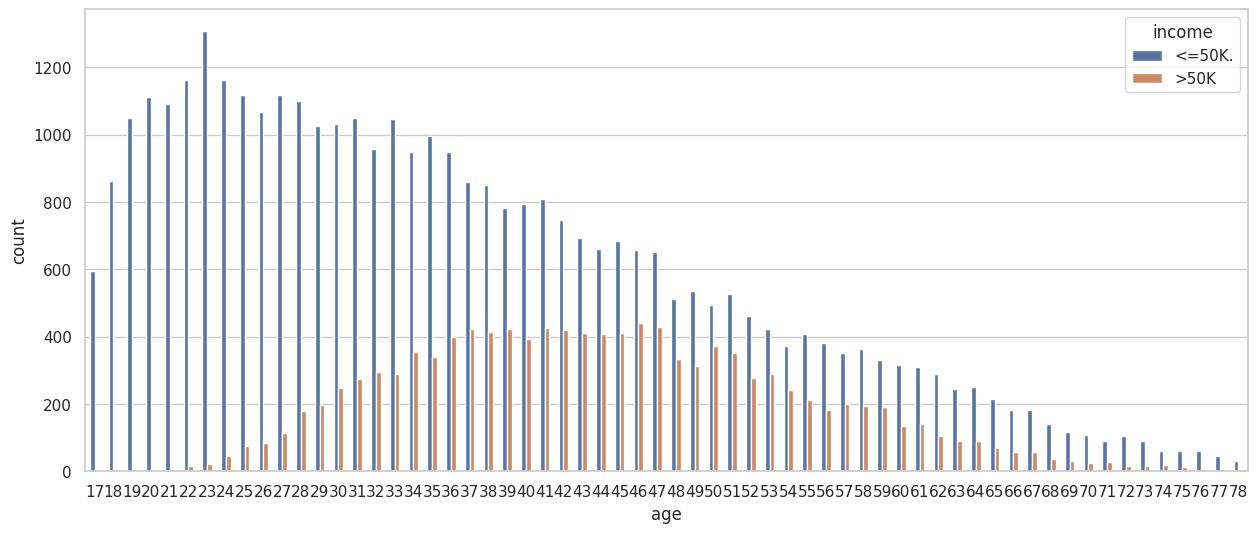

count    48626.000000
mean        38.443631
std         13.404926
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         78.000000
Name: age, dtype: float64

In [85]:
plt.figure(figsize=(15, 6))
sns.countplot(x='age', hue='income', data = preprocessing_adult_dataset, width=0.5)
plt.show()

#statistical Analysis of 'age' column after trimming
preprocessing_adult_dataset['age'].describe()

## 'education' & 'education-num' Column Analysis




In [86]:
"""The 'education' column contains the education level of each adult as in a categorical variable (16 values)and
the 'education-num' is the respective numerical value of the  'education' of the adult."""

# print(len(adult_dataset['education'].unique()))
# print(len(adult_dataset['education-num'].unique()))
preprocessing_adult_dataset['education'].value_counts()

HS-grad         15715
Some-college    10853
Bachelors        8000
Masters          2644
Assoc-voc        2055
11th             1806
Assoc-acdm       1596
10th             1381
7th-8th           927
Prof-school       823
9th               754
12th              655
Doctorate         590
5th-6th           504
1st-4th           240
Preschool          83
Name: education, dtype: int64

In [87]:
#droping the 'education' column and keeping 'education-num' column, since both columns are correlated.
preprocessing_adult_dataset.drop(['education'], axis= 1, inplace= True)
preprocessing_adult_dataset

<ipython-input-87-5c2c29666d49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessing_adult_dataset.drop(['education'], axis= 1, inplace= True)


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


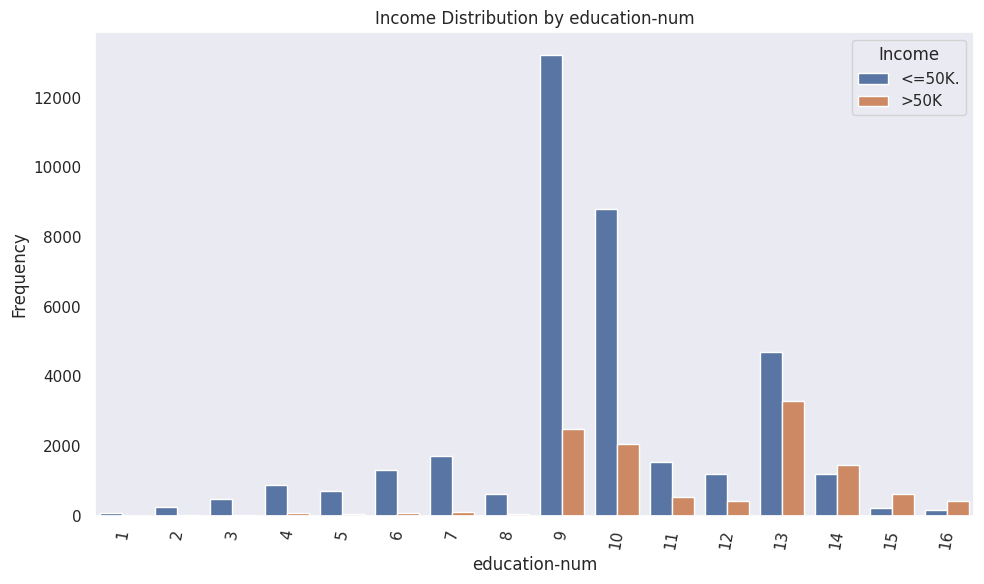



+--------+----+-----+-----+-----+-----+------+------+-----+-------+------+------+------+------+------+-----+-----+
| income | 1  |  2  |  3  |  4  |  5  |  6   |  7   |  8  |   9   |  10  |  11  |  12  |  13  |  14  | 15  | 16  |
+--------+----+-----+-----+-----+-----+------+------+-----+-------+------+------+------+------+------+-----+-----+
| <=50K. | 82 | 232 | 477 | 865 | 713 | 1295 | 1715 | 608 | 13219 | 8792 | 1534 | 1186 | 4695 | 1190 | 213 | 161 |
|  >50K  | 1  |  8  | 27  | 62  | 41  |  86  |  91  | 47  | 2496  | 2061 | 521  | 410  | 3305 | 1454 | 610 | 429 |
+--------+----+-----+-----+-----+-----+------+------+-----+-------+------+------+------+------+------+-----+-----+


In [88]:
sns.set(style="dark")

# count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='education-num', hue='income', data=preprocessing_adult_dataset)
plt.title('Income Distribution by education-num')
plt.xlabel('education-num')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

print("\n")

# Group the data by 'education-num' and 'income' and calculate the counts and display in the pretty table
workclass_income_counts = preprocessing_adult_dataset.groupby(['income', 'education-num']).size().unstack(fill_value=0)
pretty_table = tabulate(workclass_income_counts, headers='keys', tablefmt='pretty')
print(pretty_table)

## 'capital-gain' Column Analysis

In [89]:
# print("No of unique values in 'capital-gain' column :", len(preprocessing_adult_dataset['capital-gain'].unique()))
print(preprocessing_adult_dataset['capital-gain'].value_counts())

print("\n\nStatistical analysis of 'capital-gain' column : ", preprocessing_adult_dataset['capital-gain'].describe())

0        44623
15024      513
7688       410
7298       364
99999      243
         ...  
18481        1
1639         1
1111         1
22040        1
6612         1
Name: capital-gain, Length: 123, dtype: int64


Statistical analysis of 'capital-gain' column :  count    48626.000000
mean      1076.534488
std       7450.412818
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


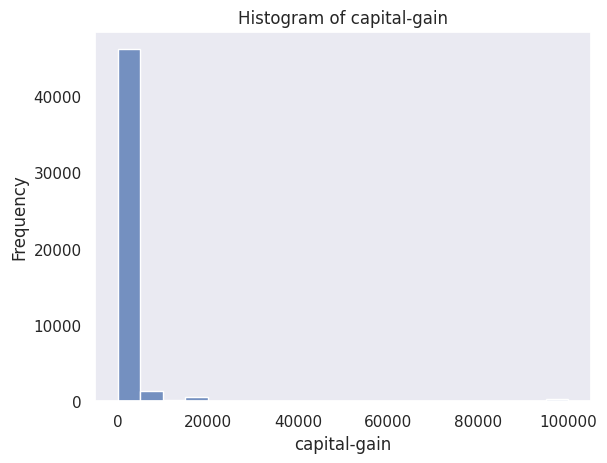

In [90]:
# Histogram
sns.histplot(preprocessing_adult_dataset['capital-gain'], bins=20)
plt.title('Histogram of capital-gain')
plt.xlabel('capital-gain')
plt.ylabel('Frequency')
plt.show()

# # Box Plot
# sns.boxplot(preprocessing_adult_dataset['capital-gain'], orient='h')
# plt.title('Boxplot of capital-gain')
# plt.xlabel('capital-gain')
# plt.ylabel('Frequency')
# plt.show()


# plt.figure(figsize=(15, 6))
# sns.countplot(x='income', hue='capital-gain', data=preprocessing_adult_dataset, width=0.5)
# plt.show()


### standardization of 'capital-gain'

In [91]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the 'capital-gain' column and transform it
preprocessing_adult_dataset['capital-gain_scaled'] = scaler.fit_transform(preprocessing_adult_dataset[['capital-gain']])

# Drop the 'capital-gain' column
preprocessing_adult_dataset.drop(columns=['capital-gain'], inplace=True)

print(preprocessing_adult_dataset['capital-gain_scaled'].head())
# preprocessing_adult_dataset['capital-gain_scaled'].value_counts()

0    0.147304
1   -0.144495
2   -0.144495
3   -0.144495
4   -0.144495
Name: capital-gain_scaled, dtype: float64


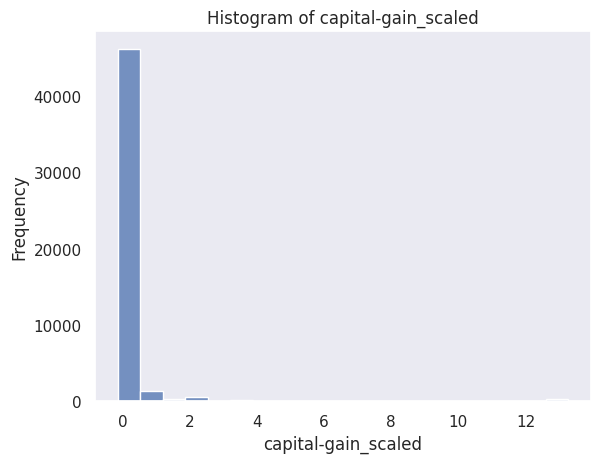

In [92]:
# Histogram
sns.histplot(preprocessing_adult_dataset['capital-gain_scaled'], bins=20)
plt.title('Histogram of capital-gain_scaled')
plt.xlabel('capital-gain_scaled')
plt.ylabel('Frequency')
plt.show()

# Box Plot
# sns.boxplot(preprocessing_adult_dataset['capital-gain_scaled'], orient='h')
# plt.title('Histogram of capital-gain_scaled')
# plt.xlabel('capital-gain_scaled')
# plt.ylabel('Frequency')
# plt.show()


# plt.figure(figsize=(15, 6))
# sns.countplot(x='income', hue='capital-gain_scaled', data=preprocessing_adult_dataset, width=0.5)
# plt.show()

## 'capital-loss' Column Analysis

In [93]:
print(preprocessing_adult_dataset['capital-loss'].unique())
print('\n\n',preprocessing_adult_dataset['capital-loss'].value_counts())
print(preprocessing_adult_dataset['capital-loss'].describe())

[   0 2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876
 1340 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653 2392
 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547 2174
 2206 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1594 3004
 2231 1844  810 2824 2559 2057 1974  974 2149 1825 1735 1258 2129 2603
 2282  323 2246 1617 1648 2489 3770 1755 3683 2267 2080 2457  155 3900
 2201 1944 2467 2163 2754 2472 4356 1411 1429 3175 1510 1870 1911 2465
 1421]


 0       46355
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: capital-loss, Length: 99, dtype: int64
count    48626.000000
mean        87.337186
std        402.052656
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


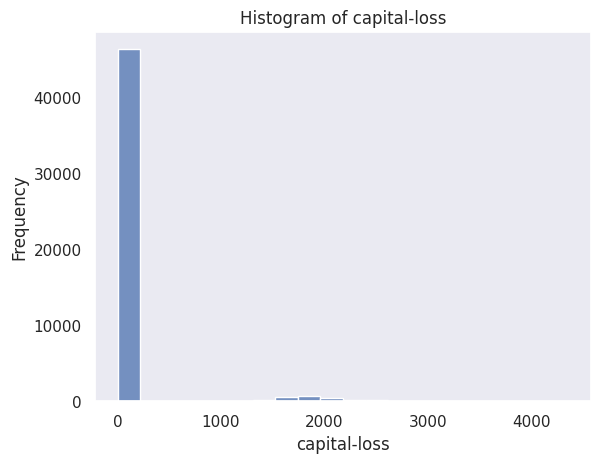

In [25]:
# Histogram
sns.histplot(preprocessing_adult_dataset['capital-loss'], bins=20)
plt.title('Histogram of capital-loss')
plt.xlabel('capital-loss')
plt.ylabel('Frequency')
plt.show()

### Standardization of 'capital-loss'


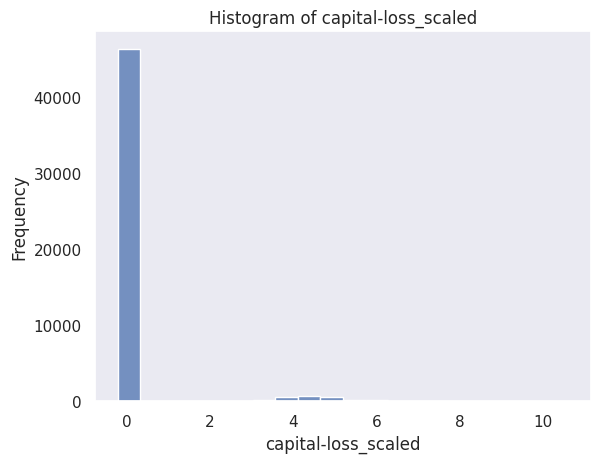

In [26]:
# Fitting the scaler to the 'capital-loss' column and transform it
preprocessing_adult_dataset['capital-loss_scaled'] = scaler.fit_transform(preprocessing_adult_dataset[['capital-loss']])

# Drop the 'capital-loss' column
preprocessing_adult_dataset.drop(columns=['capital-loss'], inplace=True)

# print(preprocessing_adult_dataset['capital-loss_scaled'].head())
# preprocessing_adult_dataset['capital-loss_scaled'].value_counts()

# Histogram
sns.histplot(preprocessing_adult_dataset['capital-loss_scaled'], bins=20)
plt.title('Histogram of capital-loss_scaled')
plt.xlabel('capital-loss_scaled')
plt.ylabel('Frequency')
plt.show()


## 'workclass' Column Analysis

### Visualizing 'workclass' column data

In [27]:
print(preprocessing_adult_dataset['workclass'].unique())
'''9 unique values including 'nan / null' .'''

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


"9 unique values including 'nan / null' ."

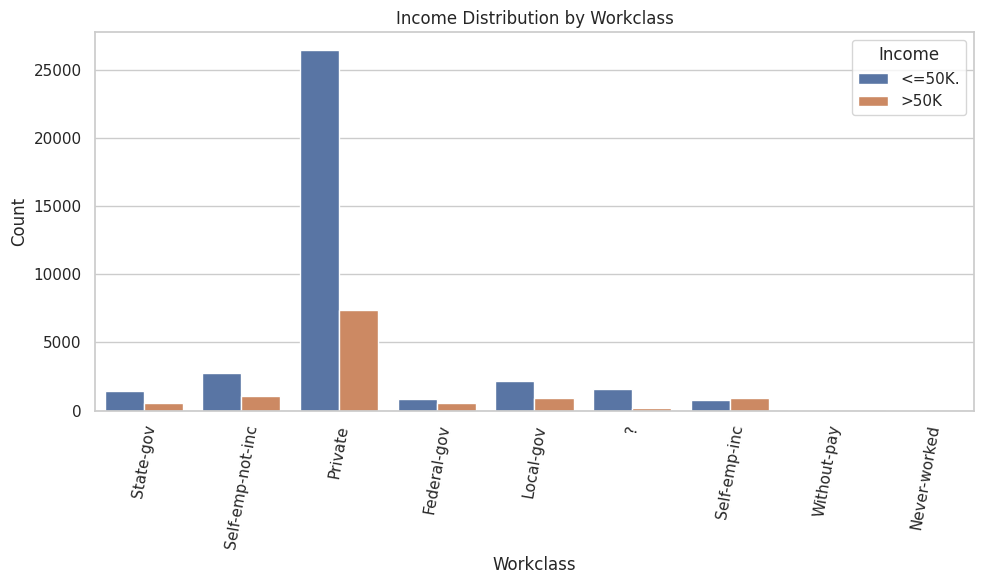



+--------+------+-------------+-----------+--------------+---------+--------------+------------------+-----------+-------------+
| income |  ?   | Federal-gov | Local-gov | Never-worked | Private | Self-emp-inc | Self-emp-not-inc | State-gov | Without-pay |
+--------+------+-------------+-----------+--------------+---------+--------------+------------------+-----------+-------------+
| <=50K. | 1616 |     869     |   2198    |      10      |  26440  |     750      |       2750       |   1450    |     19      |
|  >50K  | 185  |     560     |    925    |      0       |  7370   |     929      |       1074       |    530    |      2      |
+--------+------+-------------+-----------+--------------+---------+--------------+------------------+-----------+-------------+


In [28]:
sns.set(style="whitegrid")

# count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='income', data=preprocessing_adult_dataset)
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

print("\n")

# Group the data by 'workclass' and 'income' and calculate the counts and display the pretty table
workclass_income_counts = preprocessing_adult_dataset.groupby(['income', 'workclass']).size().unstack(fill_value=0)
pretty_table = tabulate(workclass_income_counts, headers='keys', tablefmt='pretty')
print(pretty_table)

### Preprocessing 'workclass' column data

In [29]:
# Replace null values with 'Unknown' category
preprocessing_adult_dataset['workclass'].replace(['?', np.nan],'Unknown', inplace=True)

#verify the changes done
preprocessing_adult_dataset['workclass'].value_counts()
# preprocessing_adult_dataset['workclass'].unique()

Private             33810
Self-emp-not-inc     3824
Local-gov            3123
Unknown              2750
State-gov            1980
Self-emp-inc         1679
Federal-gov          1429
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

## 'hours-per-week' Column Analysis

### visualizing 'hours-per-week' column data


In [30]:
print("Unique values under this column : \n", preprocessing_adult_dataset['hours-per-week'].unique(), '\n\n')
print("Statistical Analysis of this column : \n", preprocessing_adult_dataset['hours-per-week'].describe())


Unique values under this column : 
 [40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95 79 69] 


Statistical Analysis of this column : 
 count    48626.000000
mean        40.477995
std         12.339000
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


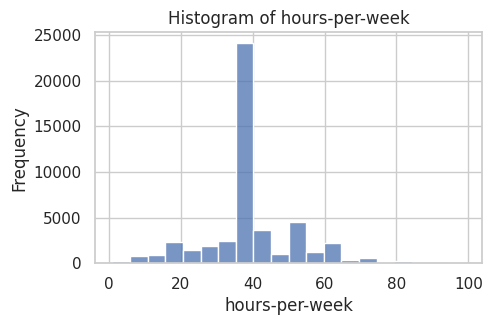

In [31]:
plt.figure(figsize=(5, 3))
sns.histplot(preprocessing_adult_dataset['hours-per-week'], bins=20)
plt.title('Histogram of hours-per-week')
plt.xlabel('hours-per-week')
plt.ylabel('Frequency')
plt.show()

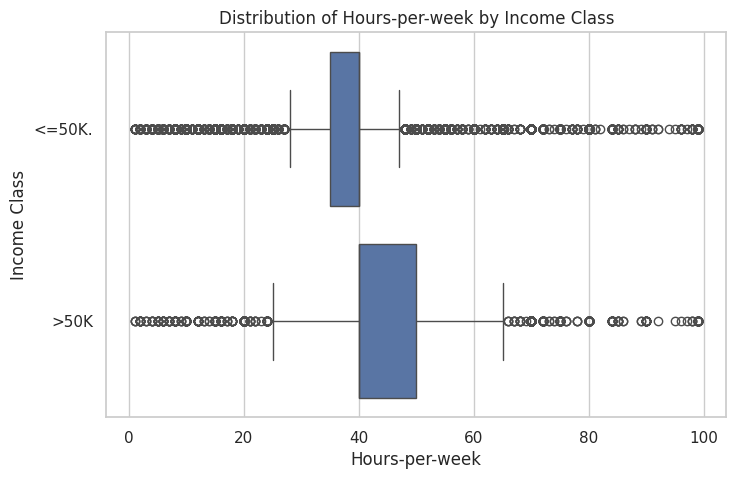

In [32]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='hours-per-week', y='income', data=preprocessing_adult_dataset)
plt.title('Distribution of Hours-per-week by Income Class')
plt.ylabel('Income Class')
plt.xlabel('Hours-per-week')
plt.show()

### preprocessing 'hours-per-week' column data


In [94]:
# Calculate the interquartile range (IQR) for the age column
Q1 = preprocessing_adult_dataset['hours-per-week'].quantile(0.25)
Q3 = preprocessing_adult_dataset['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

# Count the number of data points detected as outliers
num_outliers = ((preprocessing_adult_dataset['hours-per-week'] < lower_bound) | (preprocessing_adult_dataset['hours-per-week'] > upper_bound)).sum()
print("Number of outliers in the age column:", num_outliers)
print("\nOutliers as a percentage : ",num_outliers*100/preprocessing_adult_dataset.shape[0], "%")

Number of outliers in the age column: 13360

Outliers as a percentage :  27.47501336733435 %


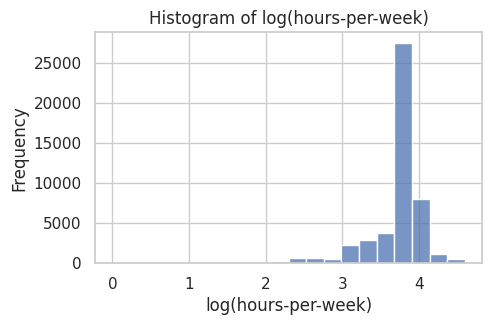

In [34]:
"""Since the no.of outliers are relatively higher, cannot remove those.
Therefore kept the data points and  transforming them into log value to speed the model process."""

adult_dataset_trfm = preprocessing_adult_dataset.copy()
adult_dataset_trfm['log(hours-per-week)'] = np.log(preprocessing_adult_dataset['hours-per-week'])
adult_dataset_trfm = adult_dataset_trfm.drop('hours-per-week', axis = 1)

plt.figure(figsize=(5, 3))
sns.histplot(adult_dataset_trfm['log(hours-per-week)'], bins=20)
plt.title('Histogram of log(hours-per-week)')
plt.xlabel('log(hours-per-week)')
plt.ylabel('Frequency')
plt.show()

# adult_dataset_trfm
# print(len(adult_dataset_trfm_age['log(age)'].unique()))
# print(len(adult_dataset['age'].unique()))

## 'sex' Column Analysis

In [35]:
preprocessing_adult_dataset['sex'].value_counts()

Male      32498
Female    16128
Name: sex, dtype: int64

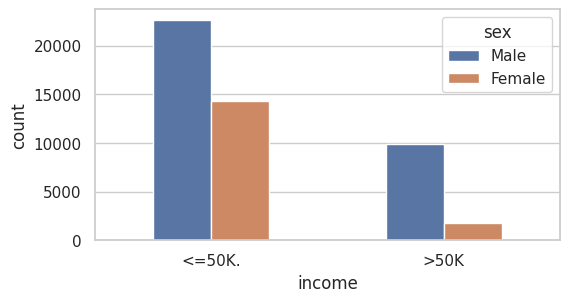

+--------+--------+------+
|  sex   | <=50K. | >50K |
+--------+--------+------+
| Female | 14363  | 1765 |
|  Male  | 22614  | 9884 |
+--------+--------+------+


In [36]:
plt.figure(figsize=(6, 3))
sns.countplot(x='income', hue='sex', data=preprocessing_adult_dataset, width=0.5)
plt.show()

# Group the data by 'sex' and 'income' and calculate the counts and display the pretty table
gender_income_counts = preprocessing_adult_dataset.groupby(['sex', 'income']).size().unstack(fill_value=0)
pretty_table = tabulate(gender_income_counts, headers='keys', tablefmt='pretty')
print(pretty_table)

## 'marital-status' Column Analysis


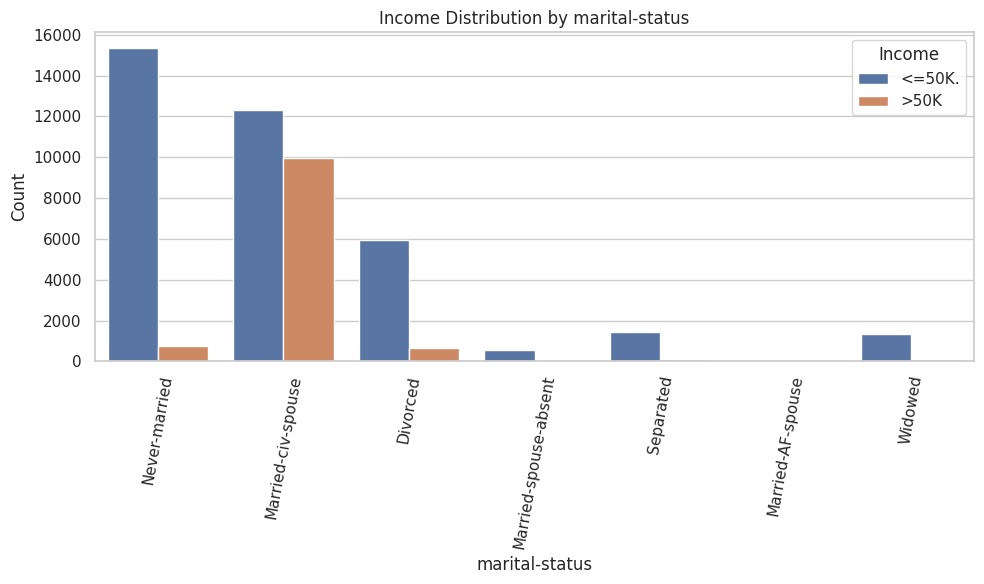

+--------+----------+-------------------+--------------------+-----------------------+---------------+-----------+---------+
| income | Divorced | Married-AF-spouse | Married-civ-spouse | Married-spouse-absent | Never-married | Separated | Widowed |
+--------+----------+-------------------+--------------------+-----------------------+---------------+-----------+---------+
| <=50K. |   5951   |        23         |       12327        |          565          |     15357     |   1428    |  1326   |
|  >50K  |   671    |        14         |        9954        |          58           |      729      |    99     |   124   |
+--------+----------+-------------------+--------------------+-----------------------+---------------+-----------+---------+


In [37]:
sns.set(style="whitegrid")

# count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='marital-status', hue='income', data=preprocessing_adult_dataset)
plt.title('Income Distribution by marital-status')
plt.xlabel('marital-status')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

# Group the data by 'marital-status' and 'income' and calculate the counts and display the pretty table
gender_income_counts = preprocessing_adult_dataset.groupby(['income', 'marital-status']).size().unstack(fill_value=0)
pretty_table = tabulate(gender_income_counts, headers='keys', tablefmt='pretty')
print(pretty_table)

## 'relationship' column analysis

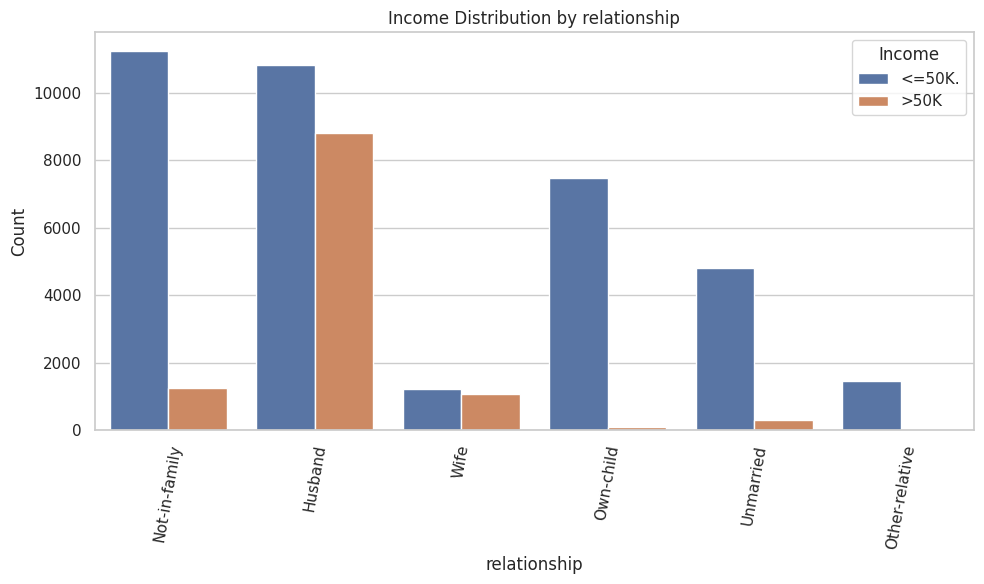

+--------+---------+---------------+----------------+-----------+-----------+------+
| income | Husband | Not-in-family | Other-relative | Own-child | Unmarried | Wife |
+--------+---------+---------------+----------------+-----------+-----------+------+
| <=50K. |  10804  |     11224     |      1450      |   7462    |   4800    | 1237 |
|  >50K  |  8819   |     1269      |       52       |    110    |    309    | 1090 |
+--------+---------+---------------+----------------+-----------+-----------+------+


In [38]:
sns.set(style="whitegrid")

# count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', hue='income', data=preprocessing_adult_dataset)
plt.title('Income Distribution by relationship')
plt.xlabel('relationship')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

# Group the data by 'relationship' and 'income' and calculate the counts and display the pretty table
gender_income_counts = preprocessing_adult_dataset.groupby(['income', 'relationship']).size().unstack(fill_value=0)
pretty_table = tabulate(gender_income_counts, headers='keys', tablefmt='pretty')
print(pretty_table)

## 'native-country' Column Analysis


In [39]:
preprocessing_adult_dataset['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

In [40]:
# Replace null values with 'Unknown' category
preprocessing_adult_dataset['native-country'].replace(['?', np.nan],'Unknown', inplace=True)

#verify the changes done
preprocessing_adult_dataset['native-country'].value_counts()

# preprocessing_adult_dataset['native-country'].unique()

United-States                 43640
Mexico                          950
Unknown                         852
Philippines                     293
Germany                         206
Puerto-Rico                     183
Canada                          180
El-Salvador                     154
India                           151
Cuba                            137
England                         125
China                           122
South                           113
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Vietnam                          86
Columbia                         85
Poland                           84
Haiti                            75
Portugal                         66
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           48
Peru                        

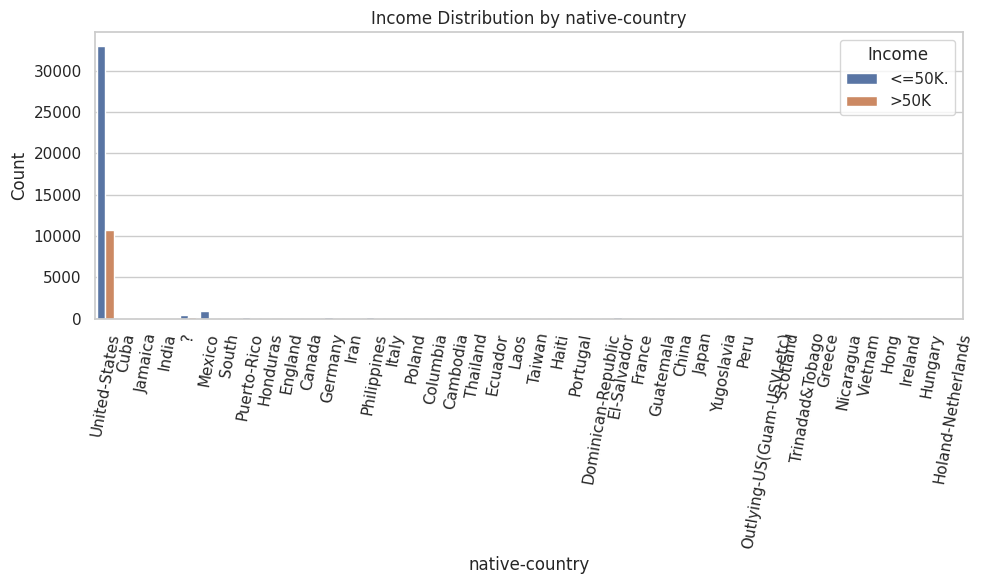

+--------+-----+----------+--------+-------+----------+------+--------------------+---------+-------------+---------+--------+---------+--------+-----------+-------+--------------------+----------+------+---------+-------+------+---------+-------+---------+-------+------+--------+-----------+----------------------------+------+-------------+--------+----------+-------------+----------+-------+--------+----------+-----------------+---------------+---------+------------+
| income |  ?  | Cambodia | Canada | China | Columbia | Cuba | Dominican-Republic | Ecuador | El-Salvador | England | France | Germany | Greece | Guatemala | Haiti | Holand-Netherlands | Honduras | Hong | Hungary | India | Iran | Ireland | Italy | Jamaica | Japan | Laos | Mexico | Nicaragua | Outlying-US(Guam-USVI-etc) | Peru | Philippines | Poland | Portugal | Puerto-Rico | Scotland | South | Taiwan | Thailand | Trinadad&Tobago | United-States | Vietnam | Yugoslavia |
+--------+-----+----------+--------+-------+--------

In [96]:
sns.set(style="whitegrid")

# count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='native-country', hue='income', data=preprocessing_adult_dataset)
plt.title('Income Distribution by native-country')
plt.xlabel('native-country')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

# Group the data by 'native-country' and 'income' and calculate the counts and display the pretty table
gender_income_counts = preprocessing_adult_dataset.groupby(['income', 'native-country']).size().unstack(fill_value=0)
pretty_table = tabulate(gender_income_counts, headers='keys', tablefmt='pretty')
print(pretty_table)

## 'race' Column Analysis


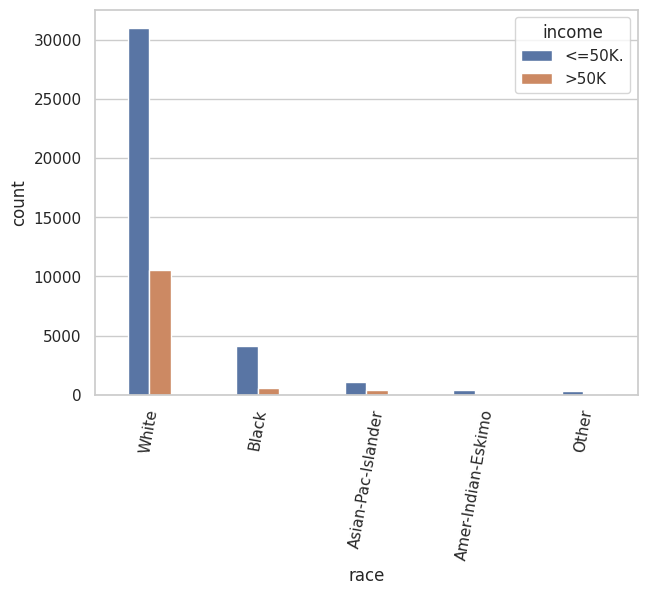

+--------+--------------------+--------------------+-------+-------+-------+
| income | Amer-Indian-Eskimo | Asian-Pac-Islander | Black | Other | White |
+--------+--------------------+--------------------+-------+-------+-------+
| <=50K. |        413         |        1102        | 4109  |  356  | 30997 |
|  >50K  |         55         |        409         |  565  |  50   | 10570 |
+--------+--------------------+--------------------+-------+-------+-------+


In [41]:
plt.figure(figsize=(7, 5))
sns.countplot(x='race', hue='income', data=preprocessing_adult_dataset, width=0.4)
plt.xticks(rotation=80)
plt.show()

# Group the data by 'race' and 'income' and calculate the counts and display the pretty table
workclass_income_counts = preprocessing_adult_dataset.groupby(['income', 'race']).size().unstack(fill_value=0)
pretty_table = tabulate(workclass_income_counts, headers='keys', tablefmt='pretty')
print(pretty_table)

## 'occupation' Column Analysis

### visualizing 'occupation' column data

In [42]:
print(preprocessing_adult_dataset['occupation'].unique())

print('\n\n', preprocessing_adult_dataset['occupation'].value_counts())

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]


 Prof-specialty       6145
Craft-repair         6105
Exec-managerial      6053
Adm-clerical         5595
Sales                5480
Other-service        4903
Machine-op-inspct    3017
Transport-moving     2351
Handlers-cleaners    2068
?                    1808
Farming-fishing      1470
Tech-support         1445
Protective-serv       981
Priv-house-serv       238
Armed-Forces           15
Name: occupation, dtype: int64


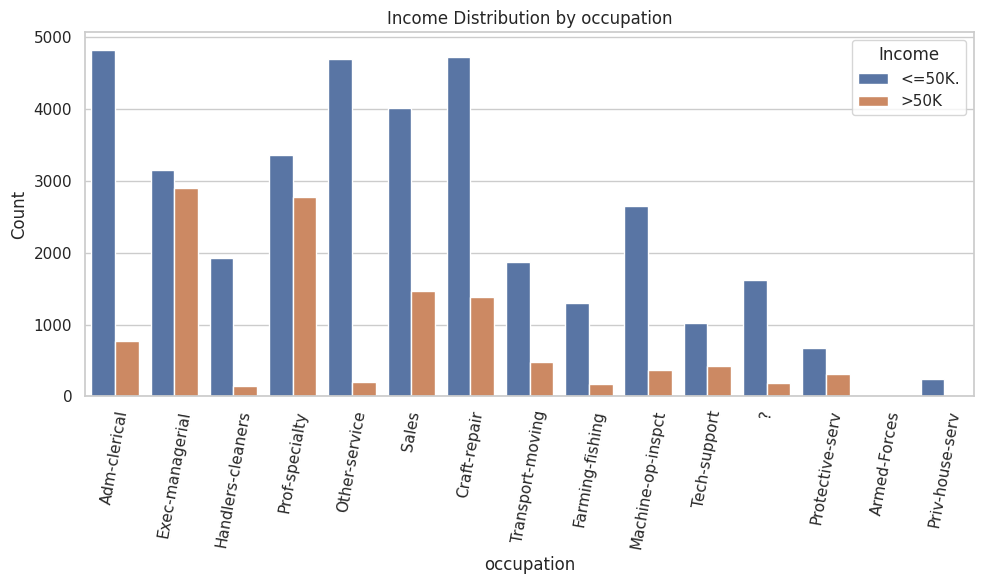



+--------+------+--------------+--------------+--------------+-----------------+-----------------+-------------------+-------------------+---------------+-----------------+----------------+-----------------+-------+--------------+------------------+
| income |  ?   | Adm-clerical | Armed-Forces | Craft-repair | Exec-managerial | Farming-fishing | Handlers-cleaners | Machine-op-inspct | Other-service | Priv-house-serv | Prof-specialty | Protective-serv | Sales | Tech-support | Transport-moving |
+--------+------+--------------+--------------+--------------+-----------------+-----------------+-------------------+-------------------+---------------+-----------------+----------------+-----------------+-------+--------------+------------------+
| <=50K. | 1623 |     4829     |      10      |     4724     |      3156       |      1300       |       1930        |       2645        |     4699      |       235       |      3366      |       673       | 4014  |     1025     |       1870       

In [43]:
sns.set(style="whitegrid")

# count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='income', data=preprocessing_adult_dataset)
plt.title('Income Distribution by occupation')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

print("\n")

# Group the data by 'occupation' and 'income' and calculate the counts and display the pretty table
occupation_income_counts = preprocessing_adult_dataset.groupby(['income', 'occupation']).size().unstack(fill_value=0)
pretty_table = tabulate(occupation_income_counts, headers='keys', tablefmt='pretty')
print(pretty_table)

### preprocessing 'occupation' column data

In [44]:
# Replace null and ? values with 'Unknown' category
preprocessing_adult_dataset['occupation'].replace(['?', np.nan],'Unknown', inplace=True)

#verify the changes done
preprocessing_adult_dataset['occupation'].value_counts()
# preprocessing_adult_dataset['occupation'].unique()

Prof-specialty       6145
Craft-repair         6105
Exec-managerial      6053
Adm-clerical         5595
Sales                5480
Other-service        4903
Machine-op-inspct    3017
Unknown              2760
Transport-moving     2351
Handlers-cleaners    2068
Farming-fishing      1470
Tech-support         1445
Protective-serv       981
Priv-house-serv       238
Armed-Forces           15
Name: occupation, dtype: int64

## Further analysis


In [45]:
#checking if still dataset contains null values
preprocessing_adult_dataset.isnull().sum()

age                    0
workclass              0
education-num          0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
hours-per-week         0
native-country         0
income                 0
capital-gain_scaled    0
capital-loss_scaled    0
dtype: int64

In [46]:
# Removing duplicates
preprocessed_adult_dataset = preprocessing_adult_dataset.copy()

# Display the number of duplicate rows and drop them.
num_of_duplicates = preprocessed_adult_dataset.duplicated().sum()
print("The total number of duplicates found in this dataset is : ", num_of_duplicates)
preprocessed_adult_dataset = preprocessed_adult_dataset.drop_duplicates()
preprocessed_adult_dataset

The total number of duplicates found in this dataset is :  6372


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital-gain_scaled,capital-loss_scaled
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K.,0.147304,-0.21723
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K.,-0.144495,-0.21723
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K.,-0.144495,-0.21723
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K.,-0.144495,-0.21723
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K.,-0.144495,-0.21723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,13,Never-married,Prof-specialty,Own-child,White,Male,40,United-States,<=50K.,-0.144495,-0.21723
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K.,-0.144495,-0.21723
48838,64,Unknown,9,Widowed,Unknown,Other-relative,Black,Male,40,United-States,<=50K.,-0.144495,-0.21723
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K.,0.587687,-0.21723


## Encoding Feature values

In [48]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,  drop='first')

feature_columns = ['race','marital-status','native-country','relationship', 'occupation', 'workclass', 'sex']

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(preprocessed_adult_dataset[feature_columns])

# Convert the encoded features back to a DataFrame (optional)
encoded_adult_dataset = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(feature_columns))

# Reset the index of the original DataFrame
preprocessed_adult_dataset.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
# Make sure to drop the original categorical columns if needed
encoded_adult_dataset = pd.concat([preprocessed_adult_dataset.drop(columns=feature_columns), encoded_adult_dataset], axis=1)

# Display the final DataFrame with one-hot encoded columns
print("Final DataFrame with one-hot encoded columns:")
encoded_adult_dataset.info()
# preprocessed_adult_dataset.isnull().sum().sum()

Final DataFrame with one-hot encoded columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42254 entries, 0 to 42253
Data columns (total 85 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        42254 non-null  int64  
 1   education-num                              42254 non-null  int64  
 2   hours-per-week                             42254 non-null  int64  
 3   income                                     42254 non-null  object 
 4   capital-gain_scaled                        42254 non-null  float64
 5   capital-loss_scaled                        42254 non-null  float64
 6   race_Asian-Pac-Islander                    42254 non-null  float64
 7   race_Black                                 42254 non-null  float64
 8   race_Other                                 42254 non-null  float64
 9   race_White                                 42254

# Model Training and Testing

## Data loading

In [49]:
final_adult_dataset = encoded_adult_dataset.copy()

In [50]:
from sklearn.model_selection import train_test_split

X = final_adult_dataset.drop(columns = ['income'])
y = final_adult_dataset.income


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion = 'gini',
                                 max_depth=30, max_features=10)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rfc_y_pred = rf_classifier.predict(X_test)

### Evaluation of Random Forest

In [53]:
!pip install --upgrade scikit-learn

Testing Accuracy :  0.8484657253293366

Training Accuracy :  0.9625384589376881


Classification Report:
              precision    recall  f1-score   support

      <=50K.       0.88      0.93      0.90      9588
        >50K       0.73      0.61      0.66      3089

    accuracy                           0.85     12677
   macro avg       0.80      0.77      0.78     12677
weighted avg       0.84      0.85      0.84     12677

Confusion Matrix:


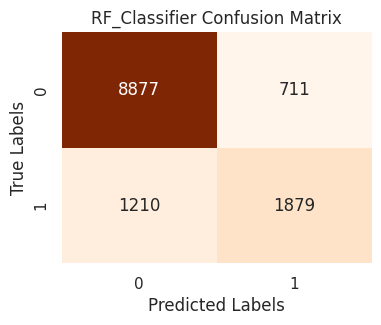

In [99]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the performance of the classifier
rfc_test_accuracy = accuracy_score(y_test, rfc_y_pred)
print("Testing Accuracy : ", rfc_test_accuracy)

# Make predictions on the train set
rfc_train_pred = rf_classifier.predict(X_train)
rfc_train_accuracy = accuracy_score(y_train, rfc_train_pred)
print("\nTraining Accuracy : ", rfc_train_accuracy)

# classification report
print("\n\nClassification Report:")
print(classification_report(y_test, rfc_y_pred))

# confusion matrix
print("Confusion Matrix:")
rfc_cm = confusion_matrix(y_test, rfc_y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('RF_Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Naive Bayes

### Gaussian Naive Bayes

Accuracy: 0.5607793642028871

Training Accuracy :  0.5696994286100686


Classification Report:
              precision    recall  f1-score   support

      <=50K.       0.96      0.44      0.60      9588
        >50K       0.35      0.94      0.51      3089

    accuracy                           0.56     12677
   macro avg       0.65      0.69      0.56     12677
weighted avg       0.81      0.56      0.58     12677

Confusion Matrix:


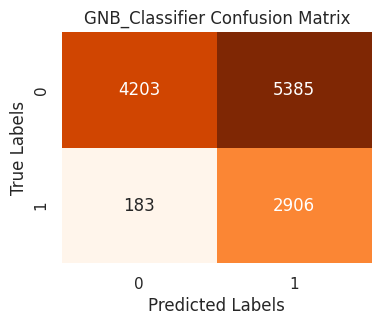

In [100]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Train classifier
gnb_classifier.fit(X_train, y_train)

# Make predictions on the test set
gnb_y_pred = gnb_classifier.predict(X_test)

# accuracy of  classifier
gnb_test_accuracy = accuracy_score(y_test, gnb_y_pred)
print("Accuracy:", gnb_test_accuracy)

# Make predictions on the train set
gnb_train_pred = gnb_classifier.predict(X_train)
gnb_train_accuracy = accuracy_score(y_train, gnb_train_pred)
print("\nTraining Accuracy : ", gnb_train_accuracy)

# classification report
print("\n\nClassification Report:")
print(classification_report(y_test, gnb_y_pred))

# confusion matrix
print("Confusion Matrix:")
gnb_cm = confusion_matrix(y_test, gnb_y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(gnb_cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('GNB_Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Bernoulli Naive Bayes

Accuracy: 0.7749467539638716

Training Accuracy :  0.7806403624437908


Classification Report:
              precision    recall  f1-score   support

      <=50K.       0.91      0.78      0.84      9588
        >50K       0.53      0.76      0.62      3089

    accuracy                           0.77     12677
   macro avg       0.72      0.77      0.73     12677
weighted avg       0.82      0.77      0.79     12677

Confusion Matrix:


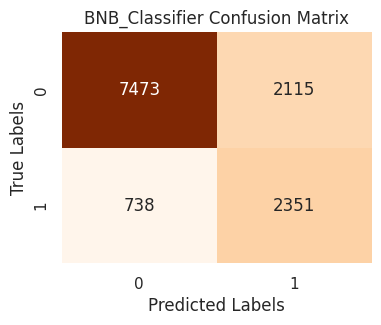

In [98]:
from sklearn.naive_bayes import BernoulliNB

# Initialize and train the Bernoulli Naive Bayes classifier
bnb_classifier = BernoulliNB()
bnb_classifier.fit(X_train, y_train)

# Make predictions on the test set
bnb_y_pred = bnb_classifier.predict(X_test)

# accuracy of  classifier
bnb_test_accuracy = accuracy_score(y_test, bnb_y_pred)
print("Accuracy:", bnb_test_accuracy)

# Make predictions on the train set
bnb_train_pred = bnb_classifier.predict(X_train)
bnb_train_accuracy = accuracy_score(y_train, bnb_train_pred)
print("\nTraining Accuracy : ", bnb_train_accuracy)

# classification report
print("\n\nClassification Report:")
print(classification_report(y_test, bnb_y_pred))

# confusion matrix
print("Confusion Matrix:")
bnb_cm = confusion_matrix(y_test, bnb_y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(bnb_cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('BNB_Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Experimental Results

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to training data
rf_grid_search.fit(X_train, y_train)

# Get best hyperparameters and best estimator
best_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_

# Evaluate best model on test data
best_rf_y_pred = best_rf_model.predict(X_test)


# Print best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)


In [ ]:
# accuracy of  classifier
best_rfc_test_accuracy = accuracy_score(y_test, best_rf_y_pred)
print("Test Accuracy:", best_rfc_test_accuracy)

# Make predictions on the train set
best_rfc_train = best_rf_model.predict(X_train)
best_rfc_train_accuracy = accuracy_score(y_train, best_rfc_train)
print("\nTraining Accuracy : ", best_rfc_train_accuracy)

# classification report
print("\n\nClassification Report:")
print(classification_report(y_test, best_rf_y_pred))

# confusion matrix
print("Confusion Matrix:")
best_rfc_cm = confusion_matrix(y_test, best_rf_y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(bnb_cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('best_rfc_Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Assuming X contains your features and y contains your target variable

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this value based on your preference

# Initialize the k-fold cross-validation splitter
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())


### LOGRITHMIC TRANSFORMATION TO AGE COLUMN


In [ ]:
# Apply logarithmic transformation to handle outliers
adult_dataset_trfm_age = preprocessing_adult_dataset.copy()
adult_dataset_trfm_age['log(age)'] = np.log(preprocessing_adult_dataset['age'])
adult_dataset_trfm_age = adult_dataset_trfm_age.drop('age', axis = 1)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Histogram
sns.histplot(adult_dataset_trfm_age['log(age)'], bins=20, ax = axes[0])
axes[0].set_title('Histogram of log(age)')
axes[0].set_xlabel('log(age)')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(data = adult_dataset_trfm_age, x='log(age)', ax=axes[1])
axes[1].set_title('Box Plot of log(age)')
axes[1].set_xlabel('log(age)')

plt.tight_layout()
plt.show()

# print(len(adult_dataset_trfm_age['log(age)'].unique()))
# print(len(adult_dataset['age'].unique()))

### Preprocessing 'capital-gain' column

In [68]:
test = preprocessing_adult_dataset.copy()
# Define the bin edges for discretizing the 'capital-gain' column
bin_edges = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
custom_labels = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

# Discretize the 'capital-gain' column into 10 groups based on the defined bin edges
test['capital-gain_group'] = pd.cut(test['capital-gain'], bins = bin_edges, labels = custom_labels, right=False)
# display(test)
# print(test['capital-gain_group'].value_counts())
print(test['capital-gain_group'].unique())

# The 'capital-gain_group' column will contains values from 0 to 9 representing the respective groups
test.drop(columns=['capital-gain'], inplace=True)

display(test)

KeyError: 'capital-gain'